<a href="https://colab.research.google.com/github/rodhipranoto/Final-Project-Data-Science---KelasWork/blob/main/Case_Study_02_Housing_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd ## membuat table
import numpy as np ## operasi matematis, interpretasi data,cleaning data

## library visualisasi
import matplotlib
import matplotlib.pyplot as plt ## membuat plot
import seaborn as sns ##grafik statistik

%matplotlib inline
## spy tdk harus pakai plt.show

matplotlib.style.use('ggplot')

In [ ]:
data = pd.read_csv('train_house (2).csv')

# 3️⃣ Cek info awal
print("=== Info Dataset ===")
print(data.info())
print("\n=== 5 Data Teratas ===")
print(data.head())

# 4️⃣ Drop nilai NaN
data_clean = data.dropna()

=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   

# 1. Variabel Kategorikal

/tmp/ipython-input-2842009264.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='pastel', order=data[col].value_counts().index)
/tmp/ipython-input-2842009264.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='pastel', order=data[col].value_counts().index)
/tmp/ipython-input-2842009264.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='pastel', order=data[col].value_counts().index)


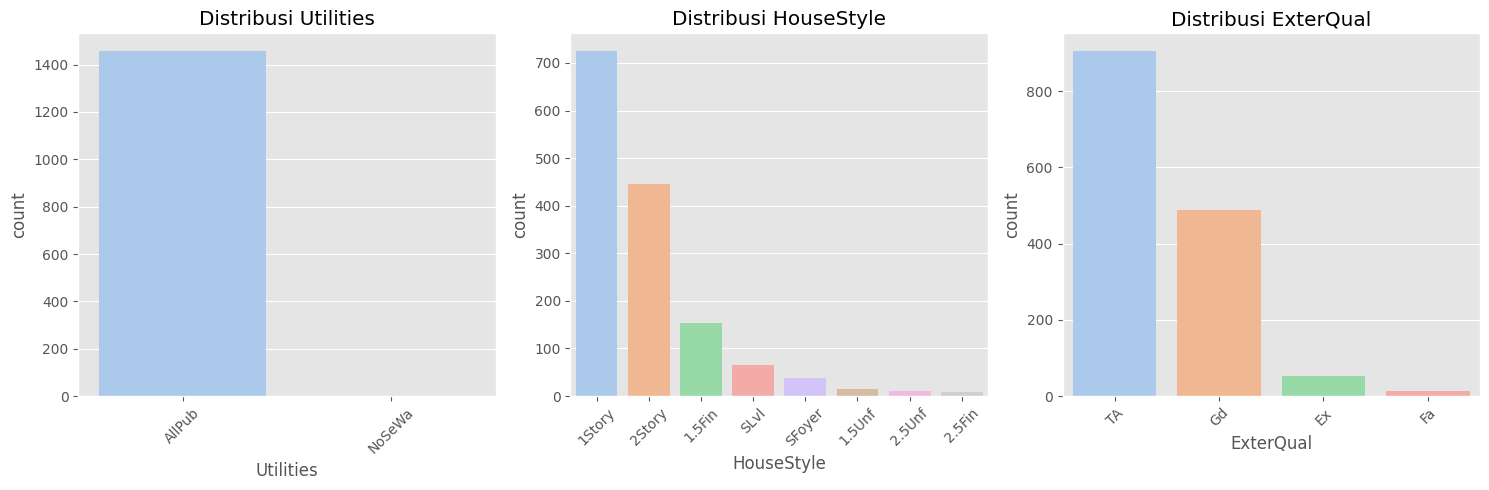

In [ ]:
# === 1️⃣ Visualisasi Variabel Kategorikal ===
categorical_vars = ['Utilities', 'HouseStyle', 'ExterQual']

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_vars, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, data=data, palette='pastel', order=data[col].value_counts().index)
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Penjelasan

a. Utilities
Hasil visualisasi: Hampir semua rumah punya utilitas AllPub (air, listrik, gas tersedia).

Analisis: Variabel ini kurang variatif karena >95% nilainya sama.
→ Kemungkinan besar tidak terlalu membantu model prediksi.



b. HouseStyle
Hasil visualisasi: Terdapat beberapa tipe rumah, tapi 1Story dan 2Story mendominasi.

Analisis: Variabel ini masih bermanfaat karena tipe rumah bisa memengaruhi harga.
Namun, kategori yang jarang (misalnya 2.5Fin) bisa digabung ke kategori lain agar tidak terlalu jarang.

c. ExterQual
Hasil visualisasi: Mayoritas rumah berada pada kualitas eksterior TA (Typical/Average) dan Gd (Good).

Analisis: Ada perbedaan kualitas yang cukup jelas. Variabel ini kemungkinan sangat berpengaruh pada harga rumah.

# 2. Variabel Numerikal

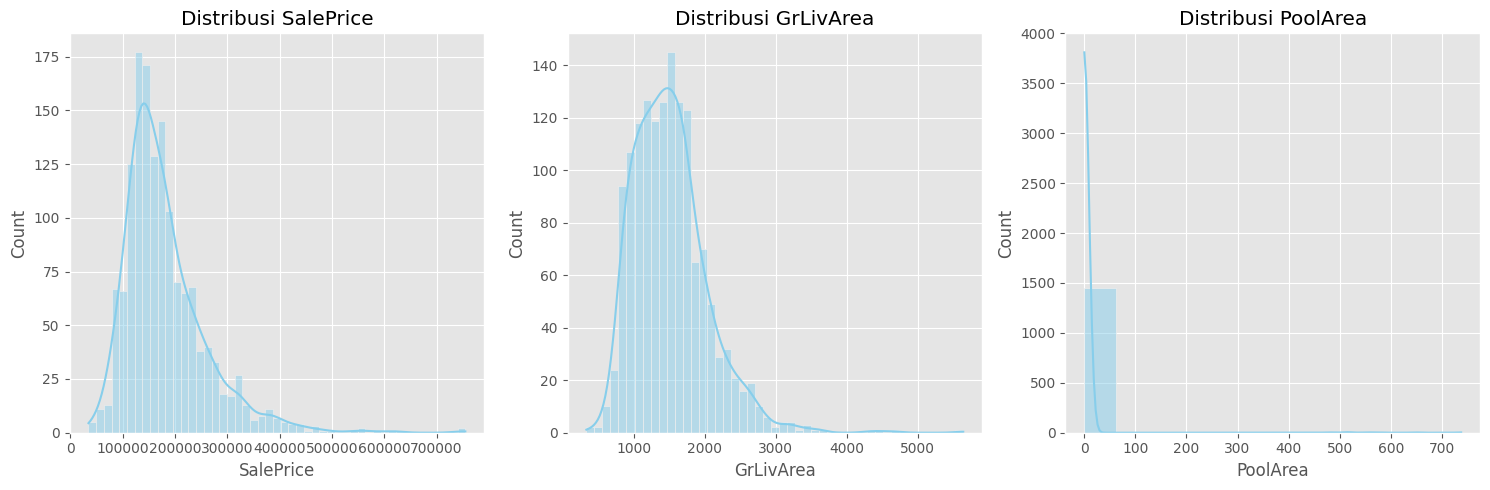

In [ ]:
# === 2️⃣ Visualisasi Variabel Numerikal ===
numerical_vars = ['SalePrice', 'GrLivArea', 'PoolArea']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_vars, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

#Penjelasan

# 2. Variabel Numerikal

a. SalePrice
Hasil visualisasi: Distribusi miring ke kanan (skewness > 1), artinya lebih banyak rumah dengan harga menengah ke bawah, dan sedikit rumah mahal yang menjadi outlier.


Analisis: Untuk modeling, distribusi ini sebaiknya diubah (misalnya dengan log transform) agar lebih simetris.

b. GrLivArea
Hasil visualisasi: Distribusi agak miring ke kanan. Ada outlier berupa rumah yang ukurannya jauh lebih besar dari mayoritas.

Analisis: Outlier ini perlu diperiksa, apakah data valid atau salah input. Distribusi juga bisa dinormalisasi jika diperlukan.

c. PoolArea
Hasil visualisasi: Hampir semua rumah memiliki nilai 0, hanya sedikit yang punya kolam renang.

Analisis: Variabel ini tidak informatif untuk kebanyakan rumah. Bisa diubah jadi variabel biner (HasPool: Ya/Tidak) agar lebih berguna.

#Kesimpulan

Kesimpulan EDA
Variabel yang kurang variatif (Utilities, PoolArea) mungkin tidak berkontribusi banyak.

Distribusi miring pada SalePrice & GrLivArea perlu transformasi.

Outlier harus diperiksa untuk memastikan kualitas data.

Kategori jarang bisa digabung agar model tidak kesulitan mengolahnya.



# 4. Transformasi Log 10

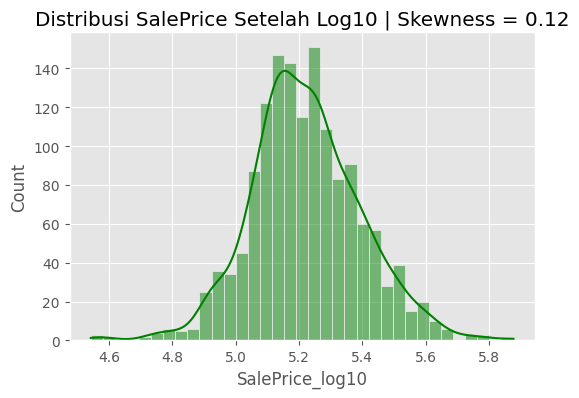

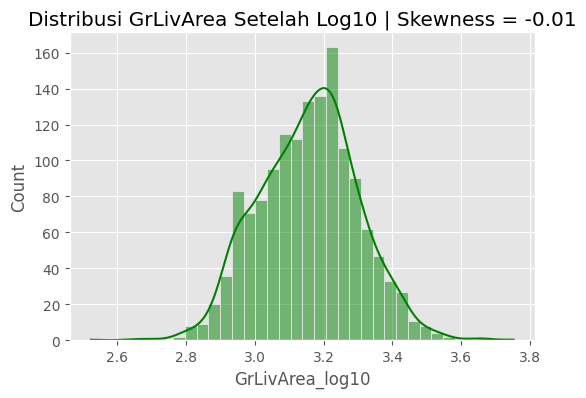

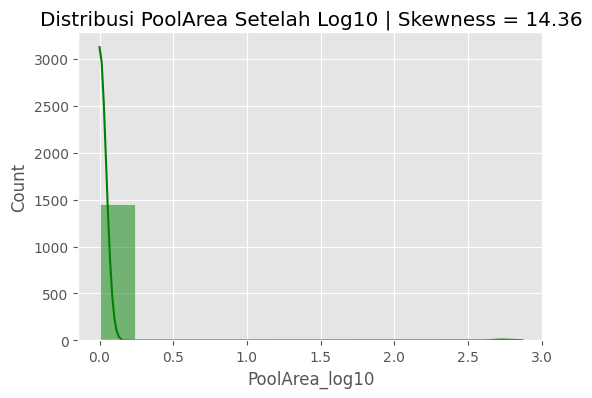

In [ ]:

# Daftar kolom numerik yang akan ditransformasi
num_cols = ['SalePrice', 'GrLivArea', 'PoolArea']

# Transformasi log10 (tambahkan 1 supaya aman untuk nilai 0)
for col in num_cols:
    data[f'{col}_log10'] = np.log10(data[col] + 1)

# Cek distribusi setelah transformasi
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[f'{col}_log10'], kde=True, color='green')
    plt.title(f"Distribusi {col} Setelah Log10 | Skewness = {data[f'{col}_log10'].skew():.2f}")
    plt.show()


# Analisis Visualisasi & Transformasi Log10

#Sebelum Transformasi

1. SalePrice terlihat right-skewed (skewness > 1). Artinya, sebagian besar rumah harganya menengah-ke-bawah, tetapi ada sedikit rumah dengan harga sangat tinggi yang menjadi outlier.


2. GrLivArea juga miring ke kanan → banyak rumah ukuran sedang, sedikit rumah sangat besar.

3. PoolArea ekstrem → sebagian besar rumah punya kolam renang nol m², hanya sedikit yang memiliki kolam, sehingga distribusinya sangat tidak merata.

#Setelah Transformasi Log10

1. Distribusi SalePrice dan GrLivArea menjadi lebih simetris (skewness mendekati 0). Hal ini memudahkan pemodelan statistik atau machine learning karena banyak algoritma bekerja optimal pada data yang mendekati normal.

2. Untuk PoolArea, transformasi log10 membantu mengecilkan efek nilai besar, tetapi karena terlalu banyak nilai 0, distribusi tetap tidak merata. Variabel ini mungkin perlu diproses berbeda (misalnya dipisahkan menjadi "punya kolam" vs "tidak punya kolam").

#Kesimpulan

Transformasi log10 efektif mengurangi skewness pada data numerikal.

Variabel dengan terlalu banyak nilai nol atau kategori dominan mungkin tidak cukup terbantu oleh log10, sehingga perlu strategi lain seperti encoding kategori atau variabel biner.

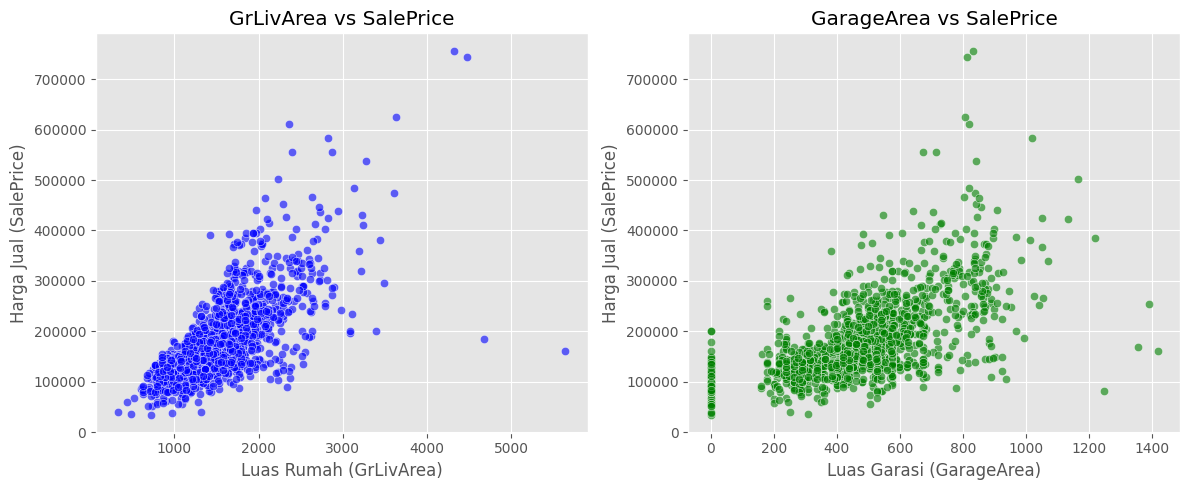

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Scatter 1: GrLivArea vs SalePrice
plt.subplot(1, 2, 1)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data, color='blue', alpha=0.6)
plt.title('GrLivArea vs SalePrice')
plt.xlabel('Luas Rumah (GrLivArea)')
plt.ylabel('Harga Jual (SalePrice)')

# Scatter 2: GarageArea vs SalePrice
plt.subplot(1, 2, 2)
sns.scatterplot(x='GarageArea', y='SalePrice', data=data, color='green', alpha=0.6)
plt.title('GarageArea vs SalePrice')
plt.xlabel('Luas Garasi (GarageArea)')
plt.ylabel('Harga Jual (SalePrice)')

plt.tight_layout()
plt.show()


# Analisis dari Scatter Plot

GrLivArea vs SalePrice

Terlihat tren positif: semakin besar luas rumah (GrLivArea), semakin tinggi harga (SalePrice).

Ada beberapa outlier rumah dengan GrLivArea besar tapi harga jauh lebih rendah dari tren umum → perlu dicek apakah itu data salah atau rumahnya punya kondisi khusus.

GarageArea vs SalePrice

Juga menunjukkan tren positif, tetapi hubungan tidak sekuat GrLivArea.

Banyak titik yang menumpuk di sekitar GarageArea 0 → rumah tanpa garasi, biasanya harga lebih rendah.

Ada sedikit outlier GarageArea sangat besar tapi harga tidak terlalu tinggi.

#3D

Visualisasi Hubungan Variabel

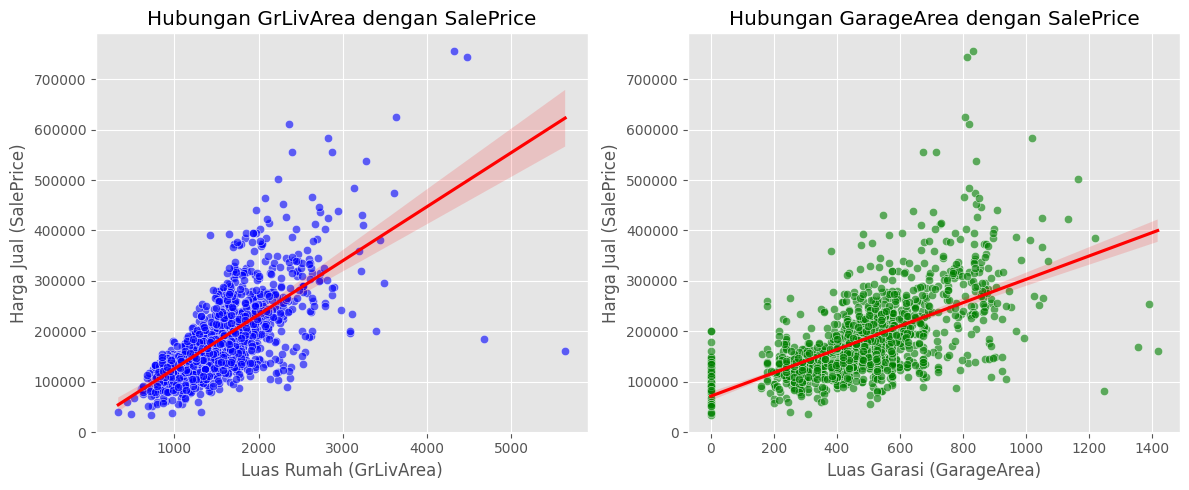

In [ ]:


plt.figure(figsize=(12, 5))

# Scatter plot 1: GrLivArea vs SalePrice
plt.subplot(1, 2, 1)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data, alpha=0.6, color='blue')
sns.regplot(x='GrLivArea', y='SalePrice', data=data, scatter=False, color='red')  # garis tren
plt.title('Hubungan GrLivArea dengan SalePrice')
plt.xlabel('Luas Rumah (GrLivArea)')
plt.ylabel('Harga Jual (SalePrice)')

# Scatter plot 2: GarageArea vs SalePrice
plt.subplot(1, 2, 2)
sns.scatterplot(x='GarageArea', y='SalePrice', data=data, alpha=0.6, color='green')
sns.regplot(x='GarageArea', y='SalePrice', data=data, scatter=False, color='red')  # garis tren
plt.title('Hubungan GarageArea dengan SalePrice')
plt.xlabel('Luas Garasi (GarageArea)')
plt.ylabel('Harga Jual (SalePrice)')

plt.tight_layout()
plt.show()


# Analisis Hubungan Antar-Variabel

GrLivArea vs SalePrice

Terlihat korelasi positif kuat: semakin besar luas rumah (GrLivArea), harga jual (SalePrice) cenderung meningkat.

Terdapat beberapa outlier rumah dengan GrLivArea besar tapi harga rendah → bisa jadi rumah tersebut butuh renovasi atau ada faktor eksternal (lokasi, kerusakan, dll).

GarageArea vs SalePrice

Korelasi positif juga terlihat, tetapi tidak sekuat GrLivArea dengan SalePrice.

Banyak rumah dengan GarageArea = 0 (tidak memiliki garasi), umumnya harga jualnya lebih rendah.

Ada beberapa garasi berukuran sangat besar, namun tidak selalu diikuti harga yang tinggi — menunjukkan luas garasi bukan faktor penentu utama harga.